# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 2.2: Modelling Techniques

### 2.2.3 ARCH and GARCH

Put simply, the ARCH model is the AR model, applied to the variance in residuals of a previously trained model. The GARCH model is the same analysis of the residuals a model, except using the ARMA model. Before we look further, we first outline some of the key attributes that GARCH deals with.

**Heteroskedasticity** refers to the attribute of some variables to have a variance of residuals that varies wildly (almost everyone uses the term "wildly" here, therefore it is basically official terminology). It is indicative that there may be more factors that explain the way in which the data varies. *Homoskedastic* variables have a consistent variance, a key component, but not a sufficient one for stationarity (for instance, the variance may be constant, but there may be a trend in the mean).

A **conditional heteroskedastic** variable is one that has a conditional component. For instance, if the market drops, it might go into panic, causing further drops. This drop was conditional on the previous drop.

We now have the necessary components to understand the ARCH and GARCH models:

* ARCH stands for Autoregressive Conditionally Heteroskedastic
* GARCH stands for Generalized Autoregressive Conditionally Heteroskedastic 

We apply ARCH and GARCH models *after* we have fitted a model to the original dataset. Importantly, the residuals after fitting that first model should look like it is discrete noise. The ARCH modelling then looks for a pattern in the residuals of that model, specifically at a given lag. It is this variance over time that autoregressive models cannot model, and where the ARCH and GARCH models help.


### ARCH Models

The ARCH(1) model is given by:

$ Var(y_t) = \alpha_0 + \alpha_1 y_{t-1}^2$


Which is the AR model, but on variance instead of raw values.

The GARCH(1,1) model is 

$Var(y_t) = \alpha_0 + \alpha_1 y_{t-1}^2  + \alpha_2 Var(y_{t-1})$

Which you'll notice is the ARMA model applied to the variance rather than the absolute value. The model is stable only if the sum of all $\alpha_i$ values is less than 1. 

Generalisations, such as GARCH(2, 2) are also possible by adding further lagged terms to each of the AR and MA components of the equation, in the same manner they can, for instance, be added to ARIMA.

We'll generate some data that fits this model, and then shown the residual graph and autocorrelations, highlighting what a dataset that fits ARCH/GARCH looks like.

In [2]:
%run setup.ipy

In [3]:
y = np.zeros(1000)

In [4]:
np.random.seed(42)

In [5]:
y[0] = np.random.normal()
for i in range(1, len(y)):
    y[i] = np.random.normal() * np.sqrt(5 + 0.75 * y[i-1]**2)

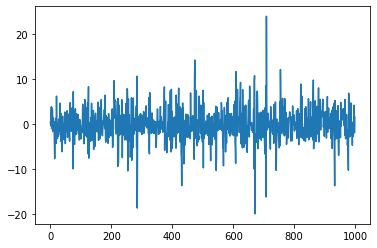

In [6]:
plt.plot(y)

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

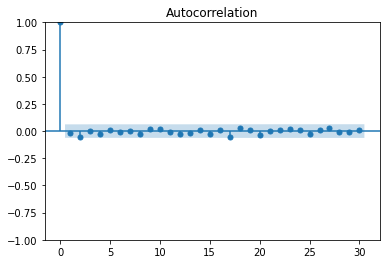

In [8]:
plot_acf(y, lags=30);

c:\env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


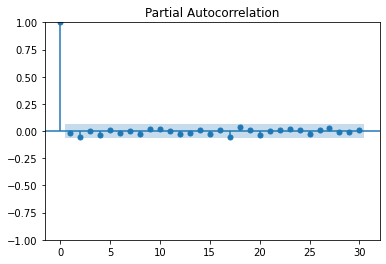

In [9]:
plot_pacf(y, lags=30);

Notice there isn't really much by the way of autocorrelation in y - it looks like white noise. This mimics the residuals *after* fitting a good model to the original data.

However, you might still suspect a problem with a variance dependent on time. To test this, first we test the same correlation, but on the squared residuals:

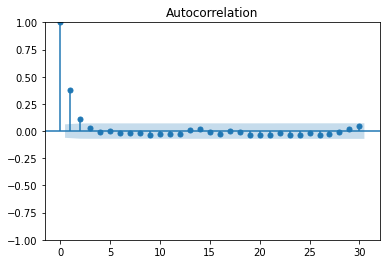

In [10]:
plot_acf(y**2, lags=30);

c:\env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


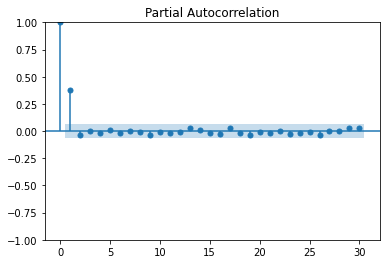

In [11]:
plot_pacf(y**2, lags=30);

Here you see a strong lagged autocorrelation at lag 1. If you see this result (for any reasonable lag), it is time to fit an ARCH model.

There is a useful arch model in the `arch` package

In [12]:
from arch import arch_model

In [17]:
model = arch_model(y, vol = 'GARCH')

In [18]:
results = model.fit()  # As per statsmodels

Iteration:      1,   Func. Count:      6,   Neg. LLF: 324290.29566441604
Iteration:      2,   Func. Count:     12,   Neg. LLF: 226075.52410248906
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6830.113526740106
Iteration:      4,   Func. Count:     25,   Neg. LLF: 3030.8231653584726
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2563.815598056422
Iteration:      6,   Func. Count:     36,   Neg. LLF: 2560.0897150451437
Iteration:      7,   Func. Count:     41,   Neg. LLF: 2558.689580480894
Iteration:      8,   Func. Count:     46,   Neg. LLF: 2558.685772194439
Iteration:      9,   Func. Count:     51,   Neg. LLF: 2558.6852215224003
Iteration:     10,   Func. Count:     56,   Neg. LLF: 2558.685118276649
Iteration:     11,   Func. Count:     60,   Neg. LLF: 2558.6851193875236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2558.685118276649
            Iterations: 11
            Function evaluations: 60
            Gradient evaluatio

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2558.69
Distribution:                  Normal   AIC:                           5125.37
Method:            Maximum Likelihood   BIC:                           5145.00
                                        No. Observations:                 1000
Date:                Sat, Jan 07 2023   Df Residuals:                      999
Time:                        23:25:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0162  7.743e-02      0.210      0.834 [ -0.136,  0.168]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.0192      1.077      4.662  3.138e-06 [  2.909,  7.129]
alpha[1]       0.6676      0.111      6.040  1.536e-09 [  0.451,  0.884]
beta[1]    2.6513e-13      0.145  1.829e-12      1.000 [ -0.284,  0.284]
========================================================================

Covariance estimator: robust
"""

We can then use the ARCH model to predict the next values, by taking the fitted model and asking it to forecast into the future. This is the predicted variance of the next value in the series.

In [80]:
# Get the last prediction when forcasting into the future. 
# This weird function call just gets us the "next" prediction.
# The actual forecast result has lots more information
prediction = results.forecast(horizon=1, start=None).mean.iloc[-1]['h.1']
prediction

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2915.84
Distribution:                  Normal   AIC:                           5843.67
Method:            Maximum Likelihood   BIC:                           5873.12
                                        No. Observations:                 1000
Date:                Sat, Jan 07 2023   Df Residuals:                      999
Time:                        23:33:58   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.8666      0.123     15.134  9.642e-52 [  1.625,  2.10

c:\env\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


From here, you can see the values for alpha are non-zero, based on the p test and beta are approximately zero. Further, there is the omega value that is 5.0192 (we used 5 for generating the data) above.

#### Exercise

1. Map the coefficients in the volatility results summary above to the model for GARCH above. Check the documentation for the function if needed.
2. Modify the code we used to *create* the data, adding a second lag term. Fit the GARCH(1,1) model again, and see what the results look like when the model does not have enough specificity. Then fit a GARCH(2,2) model and observe the improvement.

In [22]:
# qs 1
model = arch_model(y, vol = 'GARCH', p = 1, q = 1)
results = model.fit()
results.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 324290.29566441604
Iteration:      2,   Func. Count:     12,   Neg. LLF: 226075.52410248906
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6830.113526740106
Iteration:      4,   Func. Count:     25,   Neg. LLF: 3030.8231653584726
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2563.815598056422
Iteration:      6,   Func. Count:     36,   Neg. LLF: 2560.0897150451437
Iteration:      7,   Func. Count:     41,   Neg. LLF: 2558.689580480894
Iteration:      8,   Func. Count:     46,   Neg. LLF: 2558.685772194439
Iteration:      9,   Func. Count:     51,   Neg. LLF: 2558.6852215224003
Iteration:     10,   Func. Count:     56,   Neg. LLF: 2558.685118276649
Iteration:     11,   Func. Count:     60,   Neg. LLF: 2558.6851193875236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2558.685118276649
            Iterations: 11
            Function evaluations: 60
            Gradient evaluatio

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2558.69
Distribution:                  Normal   AIC:                           5125.37
Method:            Maximum Likelihood   BIC:                           5145.00
                                        No. Observations:                 1000
Date:                Sat, Jan 07 2023   Df Residuals:                      999
Time:                        23:27:53   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0162  7.743e-02      0.210      0.834 [ -0.136,  0.168]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.0192      1.077      4.662  3.138e-06 [  2.909,  7.129]
alpha[1]       0.6676      0.111      6.040  1.536e-09 [  0.451,  0.884]
beta[1]    2.6513e-13      0.145  1.829e-12      1.000 [ -0.284,  0.284]
========================================================================

Covariance estimator: robust
"""

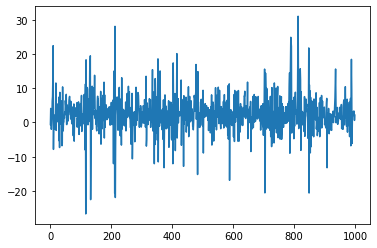

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5079.709058046277
Iteration:      2,   Func. Count:     13,   Neg. LLF: 116099.01889884044
Iteration:      3,   Func. Count:     19,   Neg. LLF: 7571.802017908774
Iteration:      4,   Func. Count:     25,   Neg. LLF: 3760.409285924256
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2921.9540752817165
Iteration:      6,   Func. Count:     36,   Neg. LLF: 2932.426695223647
Iteration:      7,   Func. Count:     42,   Neg. LLF: 2916.410310152743
Iteration:      8,   Func. Count:     47,   Neg. LLF: 2915.9282362587237
Iteration:      9,   Func. Count:     52,   Neg. LLF: 2915.8466267019794
Iteration:     10,   Func. Count:     57,   Neg. LLF: 2915.836179581095
Iteration:     11,   Func. Count:     62,   Neg. LLF: 2915.8360085129193
Iteration:     12,   Func. Count:     66,   Neg. LLF: 2915.836009006801
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2915.8360085129193
            Iterations

In [44]:
# qs 2
y2 = np.zeros(1000)
y2[0] = np.random.normal()
for i in range(1, len(y2)):
    y2[i] = np.random.normal() * np.sqrt(5 + 0.75 * y2[i-1]**2) + np.sqrt(5 + 0.2 * y[i-3]**2)

plt.plot(y2)
plt.show()

model = arch_model(y2, vol = 'GARCH', p = 1, q = 1)
results = model.fit()
print(results.summary())

In [45]:
model = arch_model(y2, vol = 'GARCH', p = 2, q = 2)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4588.774438635322
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3747.6136754934696
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2207587.7008148897
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3697.889067901465
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2920.3197874921975
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2918.547607607379
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2916.7401806468115
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2915.9700992094427
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2915.8447952457645
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2915.836051079413
Iteration:     11,   Func. Count:     82,   Neg. LLF: 2915.8360105038623
Iteration:     12,   Func. Count:     89,   Neg. LLF: 2915.8360083917287
Iteration:     13,   Func. Count:     95,   Neg. LLF: 2915.8360089040316
Optimization terminated successfully    (Exit mode 0)
 

#### Extended exercise Combining the steps

We'll now combine the steps we have covered, specifically ARIMA and GARCH, to fit a model to predict the price of the market. While this is an exercise here, a template for this code, with some parts missing, is available at:

`solutions/arima_garch_prediction_template.py`

If you get stuck, feel free to start with this template and fill out the details. If you are more confident, try solving the exercise without it.

The general process for using ARIMA and GARCH together for forecasting is to:

1. Download data, such as from Quandl, for the asset you are predicting
1. Compute the log returns for each day
1. For each day in your dataset:
    1. Fit multiple ARIMA models on the data *up to that day* and choose the best one (or use an automatic choice)
    1. Fit a GARCH model to the residuals of the ARIMA model
    1. Use the fitted GARCH model to predict the next step
    1. If positive, buy. If negative, sell
3. Backtest strategy and compare against the market gain over that time (i.e. just buying and holding).

More information: https://arch.readthedocs.io/en/latest/univariate/introduction.html

*For solutions, see `solutions/arch_models.py`*

In [8]:
%%capture
import numpy as np
import quandl
import my_secrets
from arch import arch_model
from statsmodels.tsa import stattools
from statsmodels import api as sms

# qs 1
# download data
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY
price = quandl.get("BITFINEX/XRPUSD")
price = price[["Last"]]

# qs 2
# log returns
price["log_return"] = np.log(price/price.shift(1)).dropna()

# train test split, limit the number of samples as run too long (200 takes 10 min)
price = price.iloc[-200:]

# qs 3
price_in, price_out, buy_sell = [], [], []
in_buy_sell = 0 # -1 for sell, 1 for buy, 0 for not in trade
for i in range(10, price.shape[0]):

    # get prices
    price_i = price["log_return"].iloc[:i]

    # armia
    pq = stattools.arma_order_select_ic(price_i);
    p, q = pq.bic_min_order
    model = sms.tsa.ARIMA(price_i, order=(p, 1, q));
    out = model.fit()
    
    # garch model
    model2 = arch_model(out.resid, vol = 'GARCH', p = 2, q = 2);
    out2 = model2.fit()

    # make prediction
    prediction = out2.forecast(horizon = 1, start = None);
    prediction = prediction.mean.iloc[-1]['h.1']
    
    if in_buy_sell == 0: # not in trade
        
        # place trade according to strategy
        if prediction >= 0:
            buy_sell.append(1)
            in_buy_sell = 1
        elif prediction < 0:
            buy_sell.append(-1)
            in_buy_sell = -1

        price_in.append(price["Last"].iloc[i])

    elif in_buy_sell == 1: # currently long
        
        # so can only sell
        if prediction < 0:
            price_out.append(price["Last"].iloc[i])
            in_buy_sell = 0

    elif in_buy_sell == -1: # currently short

        # so can only buy
        if prediction >= 0:
            price_out.append(price["Last"].iloc[i])
            in_buy_sell = 0

# store outputs
price_in, price_out, buy_sell = np.array(price_in), np.array(price_out), np.array(buy_sell)


Strategy return: 46.02854718166256%
Market return: 6.317416164425904%


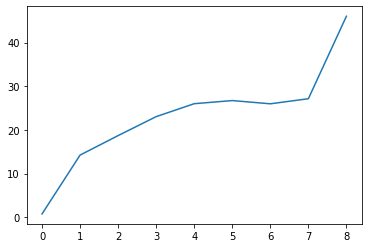

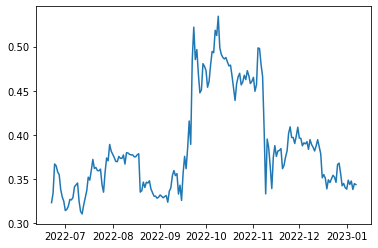

In [15]:
# qs 4
# discard active trades, now all 3 arrays should be same length
price_in = price_in[:len(price_out)]
buy_sell = buy_sell[:len(price_out)]

# compute startegy return
trade_returns = (price_out - price_in)/price_in * buy_sell * -1
trade_returns = (np.cumprod(trade_returns + 1) - 1) * 100
strategy_return = trade_returns[-1]

# compute market return
market_return = (price["Last"].iloc[-1] - price["Last"].iloc[0])/price["Last"].iloc[0] * 100

# summary
print("Strategy return: " + str(strategy_return) + "%")
print("Market return: " + str(market_return) + "%")

# plot
import matplotlib.pyplot as plt
plt.plot(trade_returns)
plt.show()
plt.plot(price["Last"])
plt.show()

- cannot run the above code for too many samples as takes way too long to run
- best can do is 200 samples which takes 10 min